In [99]:
import matplotlib.pyplot as plt

In [70]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [71]:
google_url = 'https://news.google.com/search?q=nifty&hl=en-IN&gl=IN&ceid=IN%3Aen'
tickers = ['Nifty', 'Nifty 50']

In [72]:
page = requests.get(google_url)
soup = BeautifulSoup(page.text, 'html')
c=1

In [73]:
headlines = soup.select(".m5k28", )
headline_dict = {}

for headline in headlines:
    #print(c, ":")
    #print(headline.text)
    #print("-------------------------")
    
    headline_dict[c] = headline.text
    #timestamp=headline.td.text
    
    c = c+1
    
print(headline_dict)




{1: 'MintMoreMarket Close Highlights: Sensex ends down 600pts, Nifty at 22,420; Consumer Durables, IT gain, FS, Bank down | Mint', 2: 'MoneycontrolMoreSensex, Nifty snap 5-day winning streak on profit booking; financials under selling pressure', 3: 'Hindustan TimesMoreWhy has market crashed today? Sensex down nearly 600 points, Nifty at 22,420', 4: 'MoneycontrolMoreTechnical View: Nifty forms Dark Cloud Cover pattern; 22,000 to be crucial support', 5: 'GrowwMoreNifty Non-Cyclical Consumer Index Vs Nifty 50 : A Comparative Analysis', 6: 'The Economic TimesMoreTech View: Nifty charts throw up dark clouds. What traders should do next week', 7: 'The Economic TimesMoreEdelweiss Mutual Fund launches Nifty Alpha Low Volatility 30 Index Fund', 8: 'Outlook IndiaMoreNFO Alert: Edelweiss Mutual Fund Launches Nifty Alpha Low Volatility 30 Index Fund', 9: 'CNBCTV18MoreGroww MF increases minimum investment requirements for Nifty Total Market Index Fund: What this means for inve', 10: 'The Times of I

In [74]:
timest = 0
timestamps = soup.select(".UOVeFe")
timestamp_dict = {}
for timestamp in timestamps:
    #print("Timestamp" ,timest, " :")
    #print(timestamp.text)
    #print("-------------------------")
    timest = timest+1
    timestamp_dict[timest]= timestamp.text
    
print(timestamp_dict)

{1: '1 day agoPranay PrakashBy Pranay Prakash', 2: '1 day ago', 3: '1 day ago', 4: '1 day agoSunil MatkarBy Sunil Matkar', 5: '1 day ago', 6: '2 days agoNikhil AgarwalBy Nikhil Agarwal', 7: '1 day agoSurbhi KhannaBy Surbhi Khanna', 8: '2 days ago', 9: '1 day ago', 10: '5 days ago', 11: '3 days agoNikhil AgarwalBy Nikhil Agarwal', 12: '13 days agoHarshita TyagiBy Harshita Tyagi', 13: '31 MarNishant KumarBy Nishant Kumar', 14: '7 hours agoNikita PrasadBy Nikita Prasad', 15: '7 hours ago', 16: '2 days ago', 17: "8 hours agoNigel D'SouzaBy Nigel D'Souza", 18: '2 days ago', 19: '8 hours agoBijoy Ghosh, Siddharth Mathew Cherian and Rowan BarnettBy Bijoy Ghosh, Siddharth Mathew Cherian and Rowan Barnett', 20: '2 days agoAnkit GohelBy Ankit Gohel', 21: '4 hours ago', 22: '2 days agoAsit ManoharBy Asit Manohar', 23: '2 days agoNishant KumarBy Nishant Kumar', 24: '2 days agoAsit ManoharBy Asit Manohar', 25: '2 days ago', 26: '3 days ago', 27: '3 days agoAnkit GohelBy Ankit Gohel', 28: '2 days ag

In [75]:
# Create DataFrame from dictionary with index
df = pd.DataFrame.from_dict(headline_dict, orient='index', columns=['Headline'])

# Save DataFrame to CSV
df.to_csv('my_file.csv', header=True)


In [76]:
news = pd.read_csv('my_file.csv')

In [77]:
news.head()

,Unnamed: 0,Headline
0,1,MintMoreMarket Close Highlights: Sensex ends d...
1,2,"MoneycontrolMoreSensex, Nifty snap 5-day winni..."
2,3,Hindustan TimesMoreWhy has market crashed toda...
3,4,MoneycontrolMoreTechnical View: Nifty forms Da...
4,5,GrowwMoreNifty Non-Cyclical Consumer Index Vs ...


In [78]:
import pandas as pd
# Create DataFrame from dictionary with index
df = pd.DataFrame.from_dict(timestamp_dict, orient='index', columns=['Timestamp'])

# Save DataFrame to CSV
df.to_csv('timestamp_file.csv', header=True)

In [79]:
time = pd.read_csv('timestamp_file.csv')

In [80]:
time.head()

,Unnamed: 0,Timestamp
0,1,1 day agoPranay PrakashBy Pranay Prakash
1,2,1 day ago
2,3,1 day ago
3,4,1 day agoSunil MatkarBy Sunil Matkar
4,5,1 day ago


In [81]:
news_data = news.merge(time,on= 'Unnamed: 0')

In [82]:
news_data.head()

,Unnamed: 0,Headline,Timestamp
0,1,MintMoreMarket Close Highlights: Sensex ends d...,1 day agoPranay PrakashBy Pranay Prakash
1,2,"MoneycontrolMoreSensex, Nifty snap 5-day winni...",1 day ago
2,3,Hindustan TimesMoreWhy has market crashed toda...,1 day ago
3,4,MoneycontrolMoreTechnical View: Nifty forms Da...,1 day agoSunil MatkarBy Sunil Matkar
4,5,GrowwMoreNifty Non-Cyclical Consumer Index Vs ...,1 day ago


In [83]:
#news_data = news_data[['Headline', 'Timestamp']]

In [84]:
#news_data.head()

In [85]:
news_data.to_csv('news_data.csv', header=True)

In [86]:
# Load the CSV file
df = pd.read_csv('news_data.csv')

# Add a new column with the same value for all rows
value_to_fill = 'NIFTY'
df['Ticker'] = value_to_fill

df = pd.read_csv('news1.csv')

df['Index'] = range(num_rows)

# Save the modified DataFrame back to the CSV file
df.to_csv('newsdata_file.csv', index=False)




In [87]:
news = pd.read_csv('newsdata_file.csv')

In [88]:
news.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Headline,Timestamp,Ticker,Index
0,0,0,1,"MintMoreNifty 50, Sensex today: What to expect...",Yesterday,NIFTY,0
1,1,1,2,"MoneycontrolMoreSensex, Nifty snap 5-day winni...",Yesterday,NIFTY,1
2,2,2,3,Zee BusinessMoreAnil Singhvi strategy April 26...,Yesterday,NIFTY,2
3,3,3,4,MoneycontrolMoreTechnical View: Nifty forms Da...,23 hours agoSunil MatkarBy Sunil Matkar,NIFTY,3
4,4,4,5,The Economic TimesMoreTech View: Nifty charts ...,22 hours agoNikhil AgarwalBy Nikhil Agarwal,NIFTY,4


In [89]:
#news_data = news[['Ticker','Headline']]

In [90]:
news = news[['Index','Ticker','Headline', 'Timestamp']]

In [91]:
news.head()

,Index,Ticker,Headline,Timestamp
0,0,NIFTY,"MintMoreNifty 50, Sensex today: What to expect...",Yesterday
1,1,NIFTY,"MoneycontrolMoreSensex, Nifty snap 5-day winni...",Yesterday
2,2,NIFTY,Zee BusinessMoreAnil Singhvi strategy April 26...,Yesterday
3,3,NIFTY,MoneycontrolMoreTechnical View: Nifty forms Da...,23 hours agoSunil MatkarBy Sunil Matkar
4,4,NIFTY,The Economic TimesMoreTech View: Nifty charts ...,22 hours agoNikhil AgarwalBy Nikhil Agarwal


In [92]:
vader = SentimentIntensityAnalyzer()

In [93]:
print(vader.polarity_scores(" I think Nifty will go down beacuae of war"))

{'neg': 0.31, 'neu': 0.476, 'pos': 0.214, 'compound': -0.296}


In [94]:
print(news["Headline"])

0      MintMoreNifty 50, Sensex today: What to expect...
1      MoneycontrolMoreSensex, Nifty snap 5-day winni...
2      Zee BusinessMoreAnil Singhvi strategy April 26...
3      MoneycontrolMoreTechnical View: Nifty forms Da...
4      The Economic TimesMoreTech View: Nifty charts ...
                             ...                        
99     BusinessLineMoreSensex, Nifty rally for 6th da...
100    Business StandardMoreStock Market Highlights, ...
101    The Economic TimesMoreWhich way will Nifty swi...
102    Business StandardMoreStock Market Highlights, ...
103    The Economic TimesMorePI Industries shares up ...
Name: Headline, Length: 104, dtype: object


In [95]:
f = lambda Headline: vader.polarity_scores(Headline)['compound']
news['compound'] = news['Headline'].apply(f)

In [96]:
print(news)

     Index Ticker                                           Headline  \
0        0  NIFTY  MintMoreNifty 50, Sensex today: What to expect...   
1        1  NIFTY  MoneycontrolMoreSensex, Nifty snap 5-day winni...   
2        2  NIFTY  Zee BusinessMoreAnil Singhvi strategy April 26...   
3        3  NIFTY  MoneycontrolMoreTechnical View: Nifty forms Da...   
4        4  NIFTY  The Economic TimesMoreTech View: Nifty charts ...   
..     ...    ...                                                ...   
99      99  NIFTY  BusinessLineMoreSensex, Nifty rally for 6th da...   
100    100  NIFTY  Business StandardMoreStock Market Highlights, ...   
101    101  NIFTY  The Economic TimesMoreWhich way will Nifty swi...   
102    102  NIFTY  Business StandardMoreStock Market Highlights, ...   
103    103  NIFTY  The Economic TimesMorePI Industries shares up ...   

                                       Timestamp  compound  
0                                      Yesterday    0.0000  
1            

In [97]:
news['Timestamp'] = pd.to_datetime(news.Timestamp).dt.Timestamp

ParserError: Unknown string format: Yesterday present at position 0

/var/folders/z3/k0km7nhn4gj2573046fg4j1r0000gn/T/ipykernel_54415/675209471.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_news = news.groupby(['Ticker', 'Timestamp']).mean().unstack()


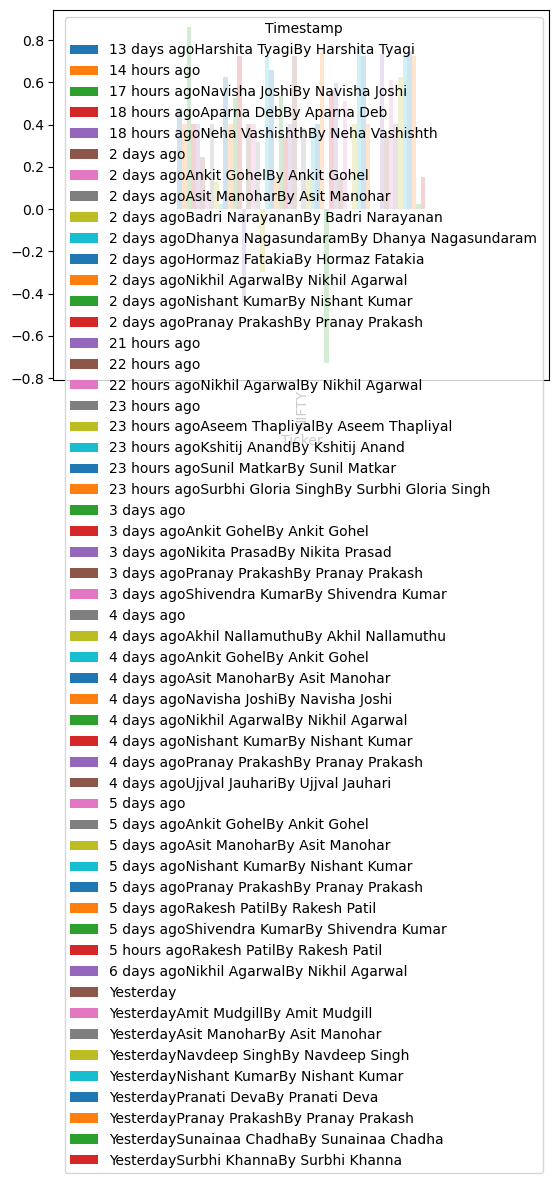

In [103]:
plt.figure
mean_news = news.groupby(['Ticker', 'Timestamp']).mean().unstack()
mean_news = mean_news.xs('compound', axis="columns")
mean_news.plot(kind='bar')
plt.show()